In [3]:
%matplotlib notebook
from matplotlib import pyplot as plt
from input_encoding.population_coding.utils import gaussian, gen_population_coding
from sklearn import datasets
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE

from lava.proc.monitor.process import Monitor
from lava.proc.lif.process import LIF
from lava.proc.io.dataloader import StateDataloader

from typing import List, Tuple

In [4]:
iris = load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [7]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


c:\users\ehajizad\lava-nc\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\ehajizad\lava-nc\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\ehajizad\lava-nc\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

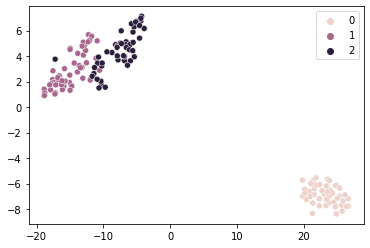

In [24]:
X_emb = TSNE(n_components=2, perplexity=30, n_iter=4000).fit_transform(X)
sns.scatterplot(X_emb[:,0], X_emb[:,1], hue=y)

In [7]:
x_min, x_max = np.min(X, 0), np.max(X, 0)
x_min, x_max

(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5]))

In [9]:
i = 3
val = 0.5
gen_population_coding(val, x_min[i], x_max[i], 11, 0.1)

[[0.25 0.8  0.95 0.41 0.07 0.   0.   0.   0.   0.   0.  ]]


array([[0.25, 0.8 , 0.95, 0.41, 0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [10]:
val = X[0,:]
print("input vector:", val)
gen_population_coding(val, x_min, x_max, 11, 0.1)


input vector: [5.1 3.5 1.4 0.2]
[[0.08 0.47 0.98 0.74 0.21 0.02 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.01 0.08 0.46 0.97 0.75 0.22 0.02 0.  ]
 [0.79 0.95 0.42 0.07 0.   0.   0.   0.   0.   0.   0.  ]
 [0.92 0.84 0.29 0.04 0.   0.   0.   0.   0.   0.   0.  ]]


array([[0.08, 0.47, 0.98, 0.74, 0.21, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.08, 0.46, 0.97, 0.75, 0.22, 0.02, 0.  ],
       [0.79, 0.95, 0.42, 0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.92, 0.84, 0.29, 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [161]:
n_neuron_per_dim = 20
sigma_ratio = 0.07
u_data = np.zeros(shape=X.shape+(n_neuron_per_dim,))
for i in range(X.shape[0]):
    x = X[i,:]
    u_data[i,:,:] = gen_population_coding(x, x_min, x_max, n_neuron_per_dim, sigma_ratio)


[[0.01 0.05 0.25 0.66 0.99 0.84 0.41 0.11 0.02 0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.1  0.37 0.81 1.   0.7
  0.28 0.06 0.01 0.   0.   0.  ]
 [0.63 0.98 0.87 0.44 0.13 0.02 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.84 0.99 0.66 0.25 0.05 0.01 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]]
[[0.06 0.27 0.68 0.99 0.82 0.39 0.1  0.02 0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.01 0.09 0.35 0.79 1.   0.72 0.29 0.07 0.01 0.
  0.   0.   0.   0.   0.   0.  ]
 [0.63 0.98 0.87 0.44 0.13 0.02 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.84 0.99 0.66 0.25 0.05 0.01 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]]
[[0.28 0.71 1.   0.8  0.36 0.09 0.01 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.03 0.17 0.53 0.93 0.93 0.53 0.17 0.0

  0.92 0.51 0.16 0.03 0.   0.  ]]
[[0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.15 0.48 0.9  0.96 0.58
  0.2  0.04 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.01 0.09 0.35 0.79 1.   0.72 0.29 0.07 0.01 0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.18
  0.55 0.94 0.92 0.51 0.16 0.03]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02
  0.14 0.47 0.9  0.96 0.59 0.2 ]]
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.04 0.19 0.57 0.95 0.91 0.49]
 [0.   0.   0.   0.   0.01 0.09 0.35 0.79 1.   0.72 0.29 0.07 0.01 0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.01 0.07 0.31 0.74 1.   0.77]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.1
  0.39 0.82 0.99 0.68 0.27 0.06]]
[[0.06 0.27 0.68 0.99 0.82 0.39 0.1  0.02 0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.01 0.08 0.34 0.77 1.   0.7

In [162]:
u_data_flat = u_data.reshape((u_data.shape[0], u_data.shape[1]*u_data.shape[2] ))
u_data_flat.shape

(150, 80)

<IPython.core.display.Javascript object>


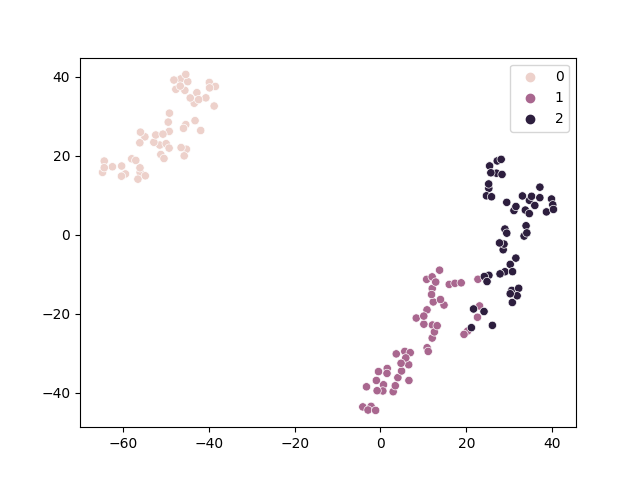

c:\users\ehajizad\lava-nc\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\ehajizad\lava-nc\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\ehajizad\lava-nc\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

In [163]:
plt.figure()
X_emb = TSNE(n_components=2, perplexity=10, n_iter=4000).fit_transform(u_data_flat)
sns.scatterplot(X_emb[:,0], X_emb[:,1], hue=y)


In [158]:
from scipy.spatial.distance import pdist, squareform

def min_max_scale(data):
    d_min = data.min()
    d_max = data.max()
    return (data-d_min)/(d_max-d_min)

# euclidian distance similarity for original Iris data
distances = pdist(X, metric='euclidean')
dist_matrix = squareform(distances)
euc_sim_org = 1/np.exp(dist_matrix)

# euclidian distance similarity for population coded data
distances = pdist(u_data_flat, metric='euclidean')
dist_matrix = squareform(distances)
euc_sim_pc = 1/np.exp(dist_matrix)

# scale up the u_data values
u_data_flat_scaled = u_data_flat*10

# dot product similarity on u_data_flat_scaled
u_data_sim = np.matmul(u_data_flat_scaled,u_data_flat_scaled.T)
u_data_sim_sc = min_max_scale(u_data_sim)

v_th=400
u_data_th1 = np.copy(u_data_sim)
u_data_th1[u_data_th1>=v_th] = v_th
u_data_th1_sc = min_max_scale(u_data_th1)

v_th=350
u_data_th2 = np.copy(u_data_sim)
u_data_th2[u_data_th2>=v_th] = v_th
u_data_th2_sc = min_max_scale(u_data_th2)

<IPython.core.display.Javascript object>


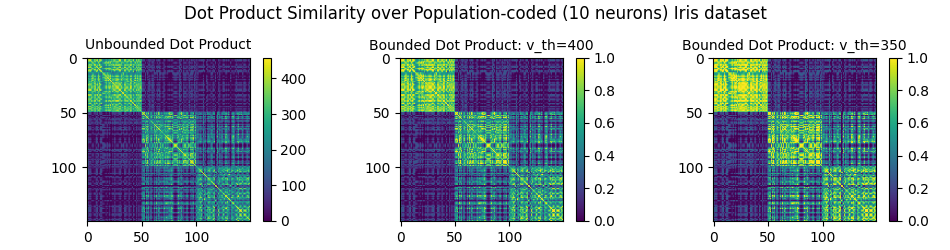

In [159]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9.5,2.5))

im1 = ax1.imshow(u_data_sim)
im2 = ax2.imshow(u_data_th1_sc)
im3 = ax3.imshow(u_data_th2_sc)
ax1.set_title("Unbounded Dot Product", fontsize=10)
ax2.set_title("Bounded Dot Product: v_th=400", fontsize=10)
ax3.set_title("Bounded Dot Product: v_th=350", fontsize=10)
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.suptitle("Dot Product Similarity over Population-coded (10 neurons) Iris dataset")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


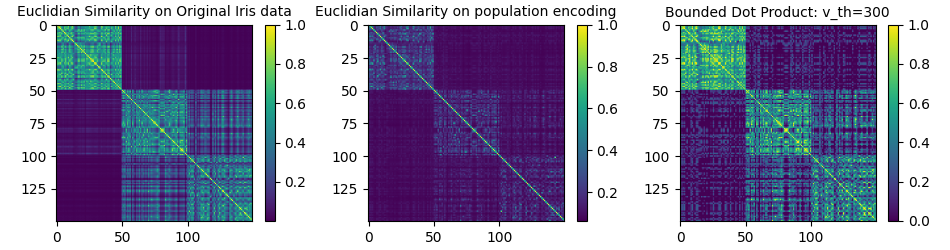

In [109]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9.5,2.5))

im1 = ax1.imshow(euc_sim_org)
im2 = ax2.imshow(euc_sim_pc)
im3 = ax3.imshow(u_data_th1_sc)
ax1.set_title("Euclidian Similarity on Original Iris data", fontsize=10)
ax2.set_title("Euclidian Similarity on population encoding", fontsize=10)
ax3.set_title("Bounded Dot Product: v_th=300", fontsize=10)
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
plt.tight_layout()
plt.show()